## 01-Enkle_eksempler-notebook_sammendrag.ipynb

> Kan du lage en infografikk (png-fil) som illustrer hovedbudskapet i notebook @01-Enkle_eksempler.ipynb 

Cursor -> Agent -> Gemini 3 Pro

> Kan du lage infografikken tilpasset en pptx-slide i wide landscape format

```bash
cd /Users/arvid/GitHub/ELMED219-2026/Lab0-ML/slides && python generate_infographic_landscape.py
```

Jeg tilpasser infografikken til 16:9-format (Wide Landscape) for PowerPoint (33.867 cm x 19.05 cm). Dette innebærer å omorganisere layouten fra stående til liggende, med tre kolonner i stedet for to.

Layout-plan for 16:9:
- **Venstre kolonne:** Konsept (Iris) + Modell (Random Forest)
- **Midtre kolonne:** Evaluering + XAI
- **Høyre kolonne:** Etikk + Trustworthy AI
- **Bunn:** Konklusjon

Jeg oppdaterer `generate_infographic.py`:

[2 tools called]

Jeg har generert en ny infografikk tilpasset **PowerPoint Wide Landscape (16:9)**:

**Fil:** `Lab0-ML/slides/ELMED219_Lab0_Infographic_16x9.png`

**Layout:**
- **3 Kolonner:**
  1. **Konsept & Modell:** Iris (læring) og Random Forest (ensemble).
  2. **Evaluering & XAI:** Konfusjonsmatrise (farlige feil) og Feature Importance.
  3. **Etikk & Trustworthy AI:** Bias-typer og de 6 etiske pilarene.
- **Header:** Tittel og undertittel.
- **Footer:** Hovedkonklusjon.

Dette formatet passer perfekt inn på en standard slide! Du kan bare dra bildet rett inn i PowerPoint. 🖼️

Infografikk lagret som ./ELMED219_Lab0_Infographic_16x9.png


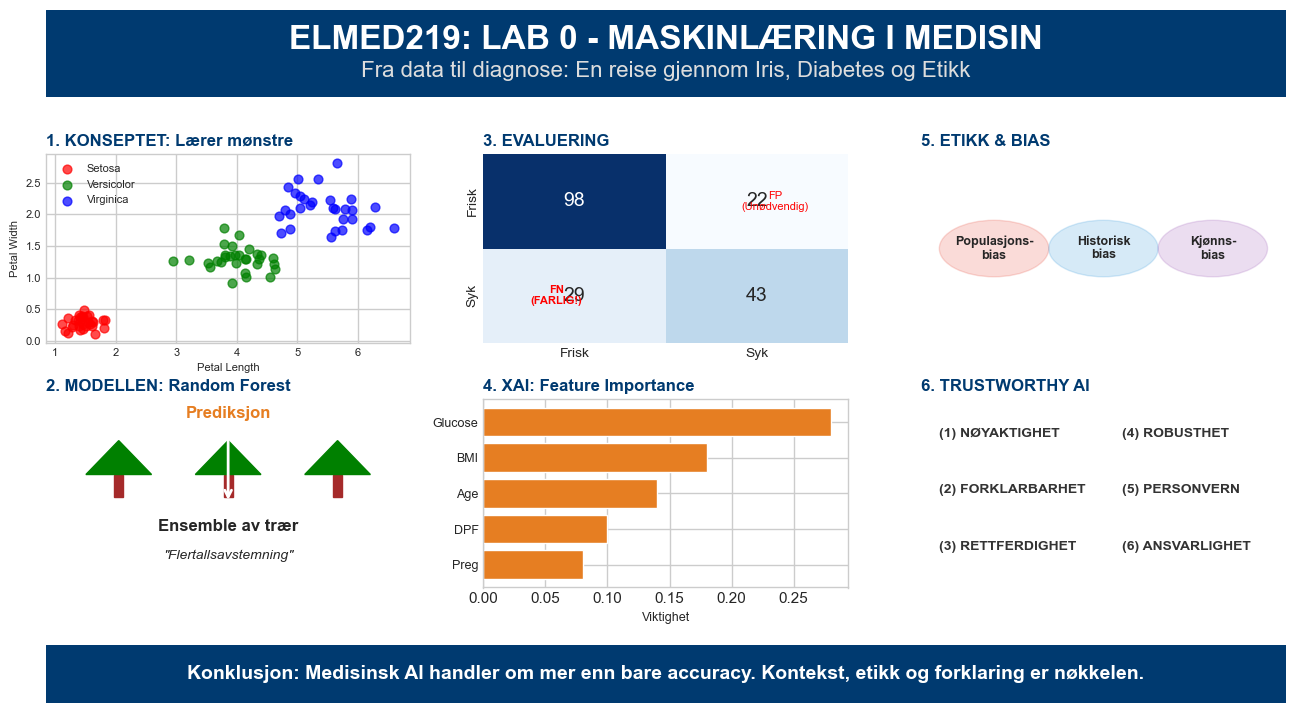

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

# Konfigurasjon for PowerPoint 16:9 (Wide)
# PowerPoint standard slide size: 13.333 x 7.5 inches (33.867 x 19.05 cm)
plt.style.use('seaborn-v0_8-whitegrid')
UIB_BLUE = '#003A70'
ACCENT_ORANGE = '#E67E22'
LIGHT_BG = '#F5F7FA'

# Opprett figur i 16:9 format
fig = plt.figure(figsize=(16, 9), facecolor='white')

# Grid layout: 
# Header (0.15)
# Content (0.75) delt i 3 kolonner
# Footer (0.1)
gs = gridspec.GridSpec(3, 3, figure=fig, height_ratios=[0.15, 0.75, 0.1], width_ratios=[1, 1, 1], wspace=0.2, hspace=0.3)

# =============================================================================
# 1. HEADER (Topp hele bredden)
# =============================================================================
ax_header = fig.add_subplot(gs[0, :])
ax_header.set_facecolor(UIB_BLUE)
ax_header.axis('off')
rect = patches.Rectangle((0, 0), 1, 1, transform=ax_header.transAxes, color=UIB_BLUE, zorder=0)
ax_header.add_patch(rect)

ax_header.text(0.5, 0.65, "ELMED219: LAB 0 - MASKINLÆRING I MEDISIN", 
              ha='center', va='center', fontsize=24, fontweight='bold', color='white')
ax_header.text(0.5, 0.3, "Fra data til diagnose: En reise gjennom Iris, Diabetes og Etikk", 
              ha='center', va='center', fontsize=16, color='#DDDDDD')


# =============================================================================
# 2. KOLONNE 1: KONSEPT & MODELL
# =============================================================================
gs_col1 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1, 0], hspace=0.3)

# --- Iris Plot ---
ax_iris = fig.add_subplot(gs_col1[0])
ax_iris.set_title("1. KONSEPTET: Lærer mønstre", fontsize=12, fontweight='bold', color=UIB_BLUE, loc='left')

np.random.seed(42)
x1, y1 = np.random.normal(1.5, 0.2, 30), np.random.normal(0.3, 0.1, 30)
x2, y2 = np.random.normal(4.0, 0.4, 30), np.random.normal(1.3, 0.2, 30)
x3, y3 = np.random.normal(5.5, 0.5, 30), np.random.normal(2.0, 0.3, 30)

ax_iris.scatter(x1, y1, c='red', label='Setosa', alpha=0.7, s=40)
ax_iris.scatter(x2, y2, c='green', label='Versicolor', alpha=0.7, s=40)
ax_iris.scatter(x3, y3, c='blue', label='Virginica', alpha=0.7, s=40)
ax_iris.legend(loc='upper left', fontsize=8)
ax_iris.set_xlabel("Petal Length", fontsize=8)
ax_iris.set_ylabel("Petal Width", fontsize=8)
ax_iris.tick_params(labelsize=8)

# --- Random Forest ---
ax_model = fig.add_subplot(gs_col1[1])
ax_model.axis('off')
ax_model.set_title("2. MODELLEN: Random Forest", fontsize=12, fontweight='bold', color=UIB_BLUE, loc='left')

def draw_tree(ax, x, y, scale=1):
    ax.add_patch(patches.Rectangle((x-0.02*scale, y-0.2*scale), 0.04*scale, 0.2*scale, color='brown'))
    ax.add_patch(patches.Polygon([[x-0.15*scale, y], [x+0.15*scale, y], [x, y+0.3*scale]], color='green'))

draw_tree(ax_model, 0.2, 0.6, 0.6)
draw_tree(ax_model, 0.5, 0.6, 0.6)
draw_tree(ax_model, 0.8, 0.6, 0.6)

ax_model.text(0.5, 0.3, "Ensemble av trær", ha='center', fontsize=12, fontweight='bold')
ax_model.text(0.5, 0.15, "\"Flertallsavstemning\"", ha='center', fontsize=10, style='italic')
ax_model.annotate("", xy=(0.5, 0.85), xytext=(0.5, 0.45), arrowprops=dict(arrowstyle="<-", lw=2))
ax_model.text(0.5, 0.9, "Prediksjon", ha='center', fontsize=12, fontweight='bold', color=ACCENT_ORANGE)


# =============================================================================
# 3. KOLONNE 2: EVALUERING & XAI
# =============================================================================
gs_col2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1, 1], hspace=0.3)

# --- Confusion Matrix ---
ax_cm = fig.add_subplot(gs_col2[0])
ax_cm.set_title("3. EVALUERING", fontsize=12, fontweight='bold', color=UIB_BLUE, loc='left')

cm_data = np.array([[98, 22], [29, 43]])
sns.heatmap(cm_data, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax_cm, annot_kws={"size": 14})
ax_cm.set_xticklabels(['Frisk', 'Syk'], fontsize=10)
ax_cm.set_yticklabels(['Frisk', 'Syk'], fontsize=10)
ax_cm.text(1.6, 0.5, "FP\n(Unødvendig)", color='red', ha='center', va='center', fontsize=8)
ax_cm.text(0.4, 1.5, "FN\n(FARLIG!)", color='red', ha='center', va='center', fontsize=8, fontweight='bold')

# --- XAI ---
ax_xai = fig.add_subplot(gs_col2[1])
ax_xai.set_title("4. XAI: Feature Importance", fontsize=12, fontweight='bold', color=UIB_BLUE, loc='left')

features = ['Glucose', 'BMI', 'Age', 'DPF', 'Preg']
importance = [0.28, 0.18, 0.14, 0.10, 0.08]
y_pos = np.arange(len(features))
ax_xai.barh(y_pos, importance, align='center', color=ACCENT_ORANGE)
ax_xai.set_yticks(y_pos)
ax_xai.set_yticklabels(features, fontsize=9)
ax_xai.invert_yaxis()
ax_xai.set_xlabel('Viktighet', fontsize=9)


# =============================================================================
# 4. KOLONNE 3: ETIKK & TRUSTWORTHY AI
# =============================================================================
gs_col3 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1, 2], hspace=0.3)

# --- Etikk ---
ax_ethics = fig.add_subplot(gs_col3[0])
ax_ethics.axis('off')
ax_ethics.set_title("5. ETIKK & BIAS", fontsize=12, fontweight='bold', color=UIB_BLUE, loc='left')

circle1 = patches.Circle((0.2, 0.5), 0.15, color='#e74c3c', alpha=0.2)
circle2 = patches.Circle((0.5, 0.5), 0.15, color='#3498db', alpha=0.2)
circle3 = patches.Circle((0.8, 0.5), 0.15, color='#9b59b6', alpha=0.2)
ax_ethics.add_patch(circle1)
ax_ethics.add_patch(circle2)
ax_ethics.add_patch(circle3)

ax_ethics.text(0.2, 0.5, "Populasjons-\nbias", ha='center', va='center', fontsize=9, fontweight='bold')
ax_ethics.text(0.5, 0.5, "Historisk\nbias", ha='center', va='center', fontsize=9, fontweight='bold')
ax_ethics.text(0.8, 0.5, "Kjønns-\nbias", ha='center', va='center', fontsize=9, fontweight='bold')

# --- Trustworthy AI ---
ax_trust = fig.add_subplot(gs_col3[1])
ax_trust.axis('off')
ax_trust.set_title("6. TRUSTWORTHY AI", fontsize=12, fontweight='bold', color=UIB_BLUE, loc='left')

pillars = ["(1) NØYAKTIGHET", "(2) FORKLARBARHET", "(3) RETTFERDIGHET", 
           "(4) ROBUSTHET", "(5) PERSONVERN", "(6) ANSVARLIGHET"]

for i, pillar in enumerate(pillars):
    col = 0 if i < 3 else 1
    row = i % 3
    ax_trust.text(0.05 + col*0.5, 0.8 - row*0.3, pillar, fontsize=10, fontweight='bold', color='#333333')


# =============================================================================
# 5. FOOTER (Bunn hele bredden)
# =============================================================================
ax_footer = fig.add_subplot(gs[2, :])
ax_footer.set_facecolor(UIB_BLUE)
ax_footer.axis('off')
rect_foot = patches.Rectangle((0, 0), 1, 1, transform=ax_footer.transAxes, color=UIB_BLUE, zorder=0)
ax_footer.add_patch(rect_foot)

ax_footer.text(0.5, 0.5, "Konklusjon: Medisinsk AI handler om mer enn bare accuracy. Kontekst, etikk og forklaring er nøkkelen.", 
              ha='center', va='center', fontsize=14, color='white', fontweight='bold')

# Lagre
output_path = './ELMED219_Lab0_Infographic_16x9.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Infografikk lagret som {output_path}")
